# AIR QUALITY IN YOGYAKARTA

# TUJUAN ANALISIS: KLASIFIKASI KUALITAS UDARA DI YOGYAKARTA BAGUS ATAU BURUK

Mendiagnosa tingkat Kualitas udara di Yogyakarta dengan menggunakan AQY dataset from Kaggle dataset (https://www.kaggle.com/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021/data?select=psi-jogja-jan-2021.csv)

# BISNIS UNDERSTANDING

## 1. Latar Belakang

Menciptakan lingkungan yang sehat dan meningkatkan kualitas hidup masyarakat adalah kualitas udara yang baik. Polusi udara di Yogyakarta dapat dipengaruhi oleh pertumbuhan penduduk, aktivitas industri dan konstruksi, peningkatan jumlah kendaraan bermotor, dan faktor alam seperti angin dan kelembaban. Polusi udara di Yogyakarta tidak hanya berdampak pada kesehatan masyarakat, seperti risiko penyakit pernapasan dan penyakit kardiovaskular, tetapi juga berdampak pada sektor ekonomi dan pariwisata, karena Yogyakarta sangat terkenal sebagai tempat wisata budaya dan pendidikan. Sekarang kualitas udara di seluruh dunia akan memburuk jika kita tidak menjaga lingkuang dengan benar, karena jika udara semakin memburuk akan menyebabkan masalah pernapasan yang serius bagi orang tua, orang penyakit paru-paru terutama di daerah perkotaan dan sering macet dengan padatnya transformasi kendaraan.

Untuk mengetahui status kualitas udara dengan cepat dan tepat sangat penting bagi pemerintah daerah, lembaga lingkungan hidup, industri, dan masyarakat umum. Ketika kualitas udara dapat diklasifikasikan menjadi "Bagus" atau "Buruk", para pemangku kepentingan dapat mengambil tindakan preventif dan reaktif. Misalnya, pemerintah dapat memberikan peringatan kepada warga, membuat kebijakan untuk mengurangi polusi, dan mendorong penggunaan transportasi hijau. Informasi ini dapat membantu industri dan pengusaha pariwisata dalam mengelola operasional dan pelayanan yang lebih baik.

Saat ini, kami dapat membangun model klasifikasi kualitas udara secara otomatis dengan menggunakan data dari sensor kualitas udara (seperti PM2.5, PM10, CO, NO2, dan O3), data cuaca, dan variabel lainnya. Diharapkan metode ini akan membuat pemantauan kualitas udara lebih mudah, menilai lebih akurat, dan membantu membuat keputusan.

## 2. Rumusan Masalah

- Bagaimana membangun model klasifikasi yang dapat secara akurat membedakan kualitas udara di Yogyakarta menjadi “Bagus” atau “Buruk” berdasarkan data historis polusi
- Sejauh mana faktor-faktor seperti konsentrasi polutan tertentu, kondisi cuaca, dan aktivitas manusia mempengaruhi kualitas udara?

## 3. Tujuan

- Mengembangkan model klasifikasi berbasis data yang dapat memprediksi kualitas udara saat ini atau pada periode tertentu.
- Meningkatkan kemampuan deteksi dini kondisi buruk kualitas udara, sehingga tindakan pencegahan

# DATA UNDERSTANDING (MEMAHAMI DATA)

Data tersebut berfokus pada kualitas udara di yogyakarta. Indikator yang digunakan dalam data tersebut yaitu PM10, PM2.5, SO2, CO, O3, NO2, Max, Critical Component.

Penjelasan teori Attribute dalam data:

Referensi dari buku yang berjudul "Data Mining Concepts and Techniques" edisi ketiga.

link : https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Dalam buku tersebut menjelaskan bahwa : Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Kata atribut, dimensi, fitur, dan variabel sering digunakan secara bergantian dalam literatur. Istilah dimensi umumnya digunakan dalam data warehousing. Pembelajaran mesin literatur cenderung menggunakan istilah fitur, sedangkan ahli statistik lebih memilih istilah variabel. Data profesional pertambangan dan basis data biasanya menggunakan istilah atribut, dan kami melakukannya di sini demikian juga. Atribut yang mendeskripsikan objek pelanggan dapat mencakup, misalnya, ID pelanggan, Nama dan alamat. Nilai yang diamati untuk atribut tertentu dikenal sebagai observasi. Satu set Atribut yang digunakan untuk mendeskripsikan objek tertentu disebut vektor atribut (atau vektor fitur). Distribusi data yang melibatkan satu atribut (atau variabel) disebut univariat. Distribusi bivariat melibatkan dua atribut, dan seterusnya.

Untuk menganalisis Kualitas udara
- Fitur: "PM10" dengan tipe data Numerik, adalah Konsentrasi partikulat kasar dengan diameter ≤ 10 mikrometer (dalam µg/m³).
- Fitur: "PM2.5" dengan tipe data Numerik, adalah Konsentrasi partikulat halus dengan diameter ≤ 2.5 mikrometer (dalam µg/m³).
- Fitur: "SO2" dengan tipe data Numerik, adalah Konsentrasi sulfur dioksida (SO2) dalam µg/m³.
- Fitur: "CO" dengan tipe data Numerik, adalah Konsentrasi karbon monoksida (CO) dalam µg/m³.
- Fitur: "O3" dengan tipe data Numerik, adalah Konsentrasi ozon (O3) dalam µg/m³.
- Fitur: "NO2" dengan tipe data Numerik, adalah Konsentrasi nitrogen dioksida (NO2) dalam µg/m³.
- Fitur: "MAX" dengan tipe data Numerik, adalah Konsentrasi maksimum polutan yang terukur selama periode waktu tertentu

## Collecting data from web to dataframe

Setelah mencari data kemudian melakukan import data ke dataframe

Kemudian menampilkan seluruh baris data di dataframe df_main

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

file_paths = glob.glob('PSI/psi-jogja-[1-5]-2021.csv') + glob.glob('PSI/psi-jogja-6-2021.csv')

data_list = [pd.read_csv(file) for file in file_paths]
df_main = pd.concat(data_list, ignore_index=True)

df_main['datetime'] = pd.to_datetime(df_main['Date'] + ' ' + df_main['Time'], errors='coerce')

df_main

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime
0,1/1/2021,00:00:00,13,40,0.0,25,0.0,0,40,PM2.5,Good,2021-01-01 00:00:00
1,1/1/2021,01:00:00,12,38,0.0,24,0.0,0,38,PM2.5,Good,2021-01-01 01:00:00
2,1/1/2021,02:00:00,11,35,0.0,23,0.0,0,35,PM2.5,Good,2021-01-01 02:00:00
3,1/1/2021,03:00:00,10,32,0.0,22,0.0,0,32,PM2.5,Good,2021-01-01 03:00:00
4,1/1/2021,04:00:00,9,29,0.0,21,0.0,0,29,PM2.5,Good,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4339,6/30/2021,19:00:00,41,62,NaN,13,NaN,6,62,PM2.5,Moderate,2021-06-30 19:00:00
4340,6/30/2021,20:00:00,40,62,NaN,12,NaN,6,62,PM2.5,Moderate,2021-06-30 20:00:00
4341,6/30/2021,21:00:00,39,61,NaN,12,NaN,6,61,PM2.5,Moderate,2021-06-30 21:00:00
4342,6/30/2021,22:00:00,38,60,NaN,11,NaN,6,60,PM2.5,Moderate,2021-06-30 22:00:00


Melihat Visualisasi histogram untuk PM10 dan PM2.5 berguna untuk melihat sebaran konsentrasi partikel di udara. Ini membantu untuk memahami seberapa sering nilai-nilai tertentu muncul dalam dataset. 

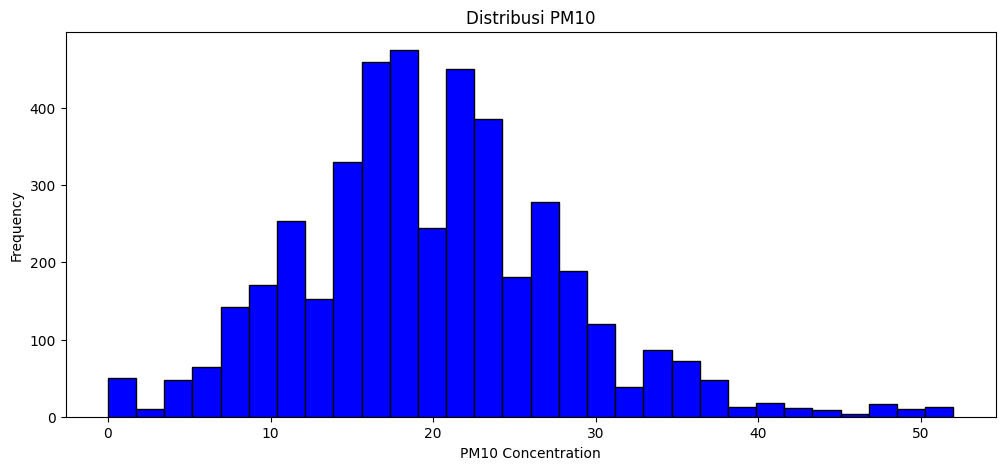

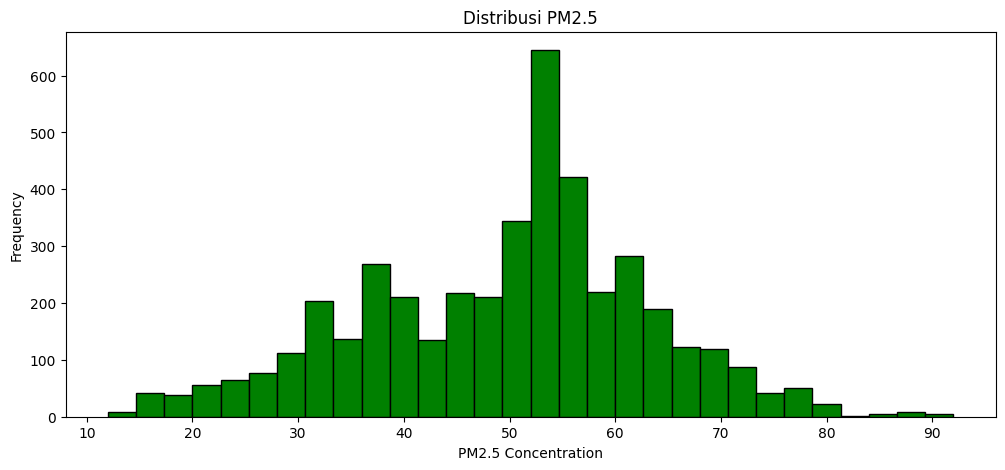

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
file_paths = glob.glob('PSI/psi-jogja-[1-5]-2021.csv') + glob.glob('PSI/psi-jogja-6-2021.csv')

# Visualisasi distribusi PM10
plt.figure(figsize=(12, 5))
plt.hist(df_main['PM10'], bins=30, color='blue', edgecolor='black')
plt.title('Distribusi PM10')
plt.xlabel('PM10 Concentration')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi PM2.5
plt.figure(figsize=(12, 5))
plt.hist(df_main['PM2.5'], bins=30, color='green', edgecolor='black')
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()


Melihat Visualisasi waktu untuk PM2.5 digunakan untuk melihat bagaimana konsentrasi PM2.5 berubah seiring waktu. Ini membantu untuk mengidentifikasi pola musiman, tren jangka panjang, dan perubahan kualitas udara dari bulan ke bulan atau bahkan hari ke hari.

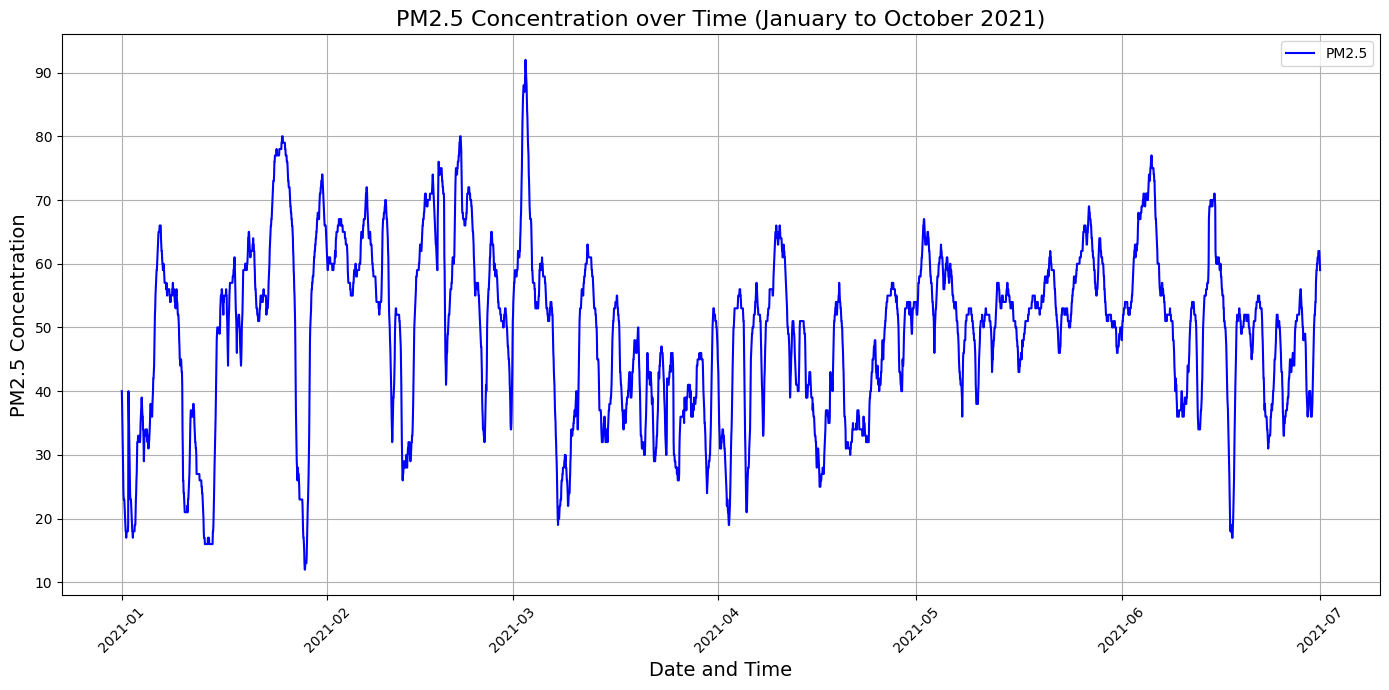

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_main['datetime'], df_main['PM2.5'], label='PM2.5', color='blue')
plt.title('PM2.5 Concentration over Time (January to October 2021)', fontsize=16)
plt.xlabel('Date and Time', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Melihat Visualisasi untuk melihat perubahan konsentrasi polutan udara pada setiap fitur

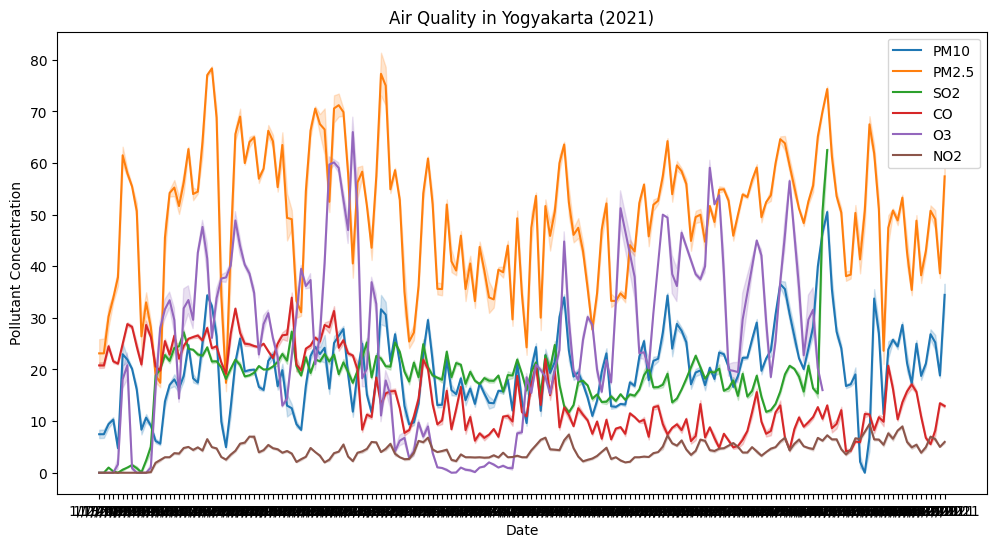

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_main, x='Date', y='PM10', label='PM10')
sns.lineplot(data=df_main, x='Date', y='PM2.5', label='PM2.5')
sns.lineplot(data=df_main, x='Date', y='SO2', label='SO2')
sns.lineplot(data=df_main, x='Date', y='CO', label='CO')
sns.lineplot(data=df_main, x='Date', y='O3', label='O3')
sns.lineplot(data=df_main, x='Date', y='NO2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2021)')
plt.legend()
plt.show()

## Data Overview (Identifikasi Data)

Konsep macam-macam tipe data

Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Hal ini berarti atribut, dimensi, fitur, dan variabel yang sering digunakan secara bergantian dalam literatur.

- Nominal attributes: atribut yang nilainya berupa simbol atau nama yang merepresentasikan kategori atau status tertentu tanpa urutan yang berarti.
- Binary attributes: atribut nominal dengan dua kategori atau status, biasanya 0 dan 1.
- Ordinal attributes: atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.
- Numeric attributes: atribut kuantitatif yang diukur dalam nilai integer atau real.

Mengamati secara langsung dari data yang diperoleh dari Air Quality in Yogyakarta, Indonesia (2021) dan mendeskripsikan langsung jumlah kolom, nama kolom, jumlah data, missing values, dan type data dari setiap kolom data tersebut

In [5]:
df_main.info()
df_main.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4344 non-null   object        
 1   Time                4344 non-null   object        
 2   PM10                4344 non-null   int64         
 3   PM2.5               4344 non-null   int64         
 4   SO2                 3742 non-null   float64       
 5   CO                  4344 non-null   int64         
 6   O3                  3338 non-null   float64       
 7   NO2                 4344 non-null   int64         
 8   Max                 4344 non-null   int64         
 9   Critical Component  4344 non-null   object        
 10  Category            4344 non-null   object        
 11  datetime            4344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 407.4+ KB


,PM10,PM2.5,SO2,CO,O3,NO2,Max,datetime
count,4344.000000,4344.000000,3742.000000,4344.000000,3338.000000,4344.000000,4344.000000,4344
mean,19.957182,49.505064,18.162747,15.059622,23.257939,4.237569,46.853591,2021-04-01 11:30:00
min,0.000000,12.000000,0.000000,3.000000,0.000000,0.000000,14.000000,2021-01-01 00:00:00
25%,15.000000,40.000000,16.000000,9.000000,8.000000,3.000000,35.000000,2021-02-15 05:45:00
50%,20.000000,52.000000,19.000000,12.000000,22.000000,4.000000,51.000000,2021-04-01 11:30:00
75%,25.000000,58.000000,21.000000,22.000000,37.000000,5.000000,58.000000,2021-05-16 17:15:00
max,52.000000,92.000000,64.000000,38.000000,71.000000,10.000000,92.000000,2021-06-30 23:00:00
std,8.187336,13.514900,7.323580,7.612137,17.091417,1.915004,15.822546,NaN


Dari hasil kode diatas yang merupakan tabel dari dataset, kita bisa menyimpulkan bahwa data ini memiliki 4344 baris dan 10 kolom

Untuk fitur dari dataset tersebut ada 6 yaitu seperti yang disebutkan diatas: PM10, PM2.5, SO2, CO, O3, NO2, Max. Sedangkan untuk targetnya adalah Critical Component.

Penjelasan dari setiap fitur yang ada pada tabel diatas:

Target : "Critical Component" dengan tipe data Categorical, adalah prediksi Parameter polutan yang memiliki konsentrasi tertinggi selama pengukuran fitur sebelumnya.

### Missing Value

Mencari missing value apakah ada missing value di data ini

setelah di cek terdapat missing value pada fitur SO2 dan O3

In [6]:
df_main.isnull().sum()

Date                     0
Time                     0
PM10                     0
PM2.5                    0
SO2                    602
CO                       0
O3                    1006
NO2                      0
Max                      0
Critical Component       0
Category                 0
datetime                 0
dtype: int64

### Outliers

Lalu, saya melakukan deteksi outlier, untuk memperbaiki kualitas data.

Menurut referensi yang didapat dari buku "Data Mining : Concept and Technique":

Link:
https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Local Outlier Factor (LOF) adalah metode deteksi outlier yang didasarkan pada kepadatan lokal suatu titik data dalam kaitannya dengan tetangga terdekatnya. Metode ini bertujuan untuk mengidentifikasi outlier lokal dengan membandingkan kepadatan lokal dari suatu titik dengan kepadatan lokal dari tetangga-tetangganya. Berikut adalah komponen utama dan langkah-langkah perhitungan dalam LOF:

#### 1. K-Tetangga Terdekat (K-Nearest Neighbors, K-NN)

- **Jarak K (k-distance)**: Jarak dari titik $ o $ ke tetangga terdekat ke-k.
  $$
  \text{k-distance}(o) = \text{dist}(o, o_k)
  $$
  di mana $ o_k $ adalah tetangga terdekat ke-k dari $ o $.

- **Lingkungan Jarak K (k-distance neighborhood)**: Himpunan titik-titik yang berada dalam jarak K dari $ o $.
  $$
  N_k(o) = \{ o' \mid \text{dist}(o, o') \leq \text{k-distance}(o) \}
  $$

#### 2. Jarak Jangkauan (Reachability Distance)

Jarak jangkauan dari titik $ o' $ ke titik $ o $ didefinisikan sebagai:
$$
\text{reachdist}_k(o', o) = \max(\text{k-distance}(o), \text{dist}(o', o))
$$

#### 3. Kepadatan Jangkauan Lokal (Local Reachability Density)

Kepadatan jangkauan lokal $ lrd_k(o) $ dari titik $ o $ adalah kebalikan dari rata-rata jarak jangkauan dari tetangga terdekatnya:
$$
lrd_k(o) = \frac{|N_k(o)|}{\sum_{o' \in N_k(o)} \text{reachdist}_k(o', o)}
$$

#### 4. Faktor Outlier Lokal (Local Outlier Factor)

Faktor outlier lokal $ LOF_k(o) $ dari titik $ o $ adalah rata-rata dari rasio kepadatan jangkauan lokal $ o $ terhadap kepadatan jangkauan lokal dari tetangga terdekatnya:
$$
LOF_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{|N_k(o)|}
$$

Data outlier sering kali mempengaruhi model data secara umum sehingga pengaruh dari data outlier tersebut harus dikurangi atau dihilangkan. Hal ini merujuk kepda https://ejurnal.its.ac.id/index.php/sains_seni/article/download/22520/3642

Proses perhitungan LOF untuk mendeteksi adanya outlier dengan 40 tetangga terdekat menggunakan jarak Euclidean (p=2).

In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, p=2)  

df_main['lof'] = lof.fit_predict(df_main[['PM2.5']])

df_main_lof = df_main[df_main['lof'] == -1]

df_main_lof

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime,lof
6,1/1/2021,06:00:00,8,24,0.0,20,0.0,0,24,PM2.5,Good,2021-01-01 06:00:00,-1
10,1/1/2021,10:00:00,7,22,0.0,21,0.0,0,22,PM2.5,Good,2021-01-01 10:00:00,-1
13,1/1/2021,13:00:00,6,19,0.0,20,0.0,0,20,CO,Good,2021-01-01 13:00:00,-1
16,1/1/2021,16:00:00,6,17,0.0,20,0.0,0,20,CO,Good,2021-01-01 16:00:00,-1
23,1/1/2021,23:00:00,6,19,0.0,20,0.0,0,20,CO,Good,2021-01-01 23:00:00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025,6/17/2021,17:00:00,8,17,NaN,10,NaN,5,17,PM2.5,Good,2021-06-17 17:00:00,-1
4026,6/17/2021,18:00:00,8,17,NaN,10,NaN,6,17,PM2.5,Good,2021-06-17 18:00:00,-1
4027,6/17/2021,19:00:00,9,19,NaN,12,NaN,6,19,PM2.5,Good,2021-06-17 19:00:00,-1
4029,6/17/2021,21:00:00,10,22,NaN,13,NaN,7,22,PM2.5,Good,2021-06-17 21:00:00,-1


# DATA PREPROCESSING (PREPROSES DATA)

### Mengatasi Missing Value

Bisa dilihat sebelumnya saat pengecekan missing value terdapat missing value, disini saya melakukan Interpolasi digunakan untuk mengisi nilai yang hilang dalam dataset dengan memprediksi nilai-nilai tersebut berdasarkan data yang ada di sekitarnya.

In [8]:
df_main = df_main.interpolate()
print(df_main)

           Date      Time  PM10  PM2.5   SO2  CO    O3  NO2  Max  \
0      1/1/2021  00:00:00    13     40   0.0  25   0.0    0   40   
1      1/1/2021  01:00:00    12     38   0.0  24   0.0    0   38   
2      1/1/2021  02:00:00    11     35   0.0  23   0.0    0   35   
3      1/1/2021  03:00:00    10     32   0.0  22   0.0    0   32   
4      1/1/2021  04:00:00     9     29   0.0  21   0.0    0   29   
...         ...       ...   ...    ...   ...  ..   ...  ...  ...   
4339  6/30/2021  19:00:00    41     62  64.0  13  16.0    6   62   
4340  6/30/2021  20:00:00    40     62  64.0  12  16.0    6   62   
4341  6/30/2021  21:00:00    39     61  64.0  12  16.0    6   61   
4342  6/30/2021  22:00:00    38     60  64.0  11  16.0    6   60   
4343  6/30/2021  23:00:00    36     59  64.0  11  16.0    6   59   

     Critical Component  Category            datetime  lof  
0                 PM2.5      Good 2021-01-01 00:00:00    1  
1                 PM2.5      Good 2021-01-01 01:00:00    1  


C:\Users\NikiR\AppData\Local\Temp\ipykernel_158736\1870272509.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_main = df_main.interpolate()


Setelah melakukan Interpolasi data, bisa dilihat missing value sudah tidak ada, dengan begini kualitas data akan semakin baik

In [9]:
df_main.isnull().sum()

Date                  0
Time                  0
PM10                  0
PM2.5                 0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
datetime              0
lof                   0
dtype: int64

### Mengatasi Outlier

Pada pengecekan outlier, bisa di lihat sendiri ada banyak data yang outlier disini saya akan mengatasi outlier dengan cara interpolate data. Teknik ini sering digunakan ketika ada data yang tidak lengkap. interpolate sangat berguna untuk mengisi nilai yang hilang pada kolom tertentu

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, p=2)
df_main['lof'] = lof.fit_predict(df_main[['PM2.5']])
df_main


,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime,lof
0,1/1/2021,00:00:00,13,40,0.0,25,0.0,0,40,PM2.5,Good,2021-01-01 00:00:00,1
1,1/1/2021,01:00:00,12,38,0.0,24,0.0,0,38,PM2.5,Good,2021-01-01 01:00:00,1
2,1/1/2021,02:00:00,11,35,0.0,23,0.0,0,35,PM2.5,Good,2021-01-01 02:00:00,1
3,1/1/2021,03:00:00,10,32,0.0,22,0.0,0,32,PM2.5,Good,2021-01-01 03:00:00,1
4,1/1/2021,04:00:00,9,29,0.0,21,0.0,0,29,PM2.5,Good,2021-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,6/30/2021,19:00:00,41,62,64.0,13,16.0,6,62,PM2.5,Moderate,2021-06-30 19:00:00,1
4340,6/30/2021,20:00:00,40,62,64.0,12,16.0,6,62,PM2.5,Moderate,2021-06-30 20:00:00,1
4341,6/30/2021,21:00:00,39,61,64.0,12,16.0,6,61,PM2.5,Moderate,2021-06-30 21:00:00,1
4342,6/30/2021,22:00:00,38,60,64.0,11,16.0,6,60,PM2.5,Moderate,2021-06-30 22:00:00,1


In [11]:
df_main.loc[df_main['lof'] == -1, 'PM2.5'] = np.nan

df_main['PM2.5'] = df_main['PM2.5'].interpolate(method='linear')

df_main

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime,lof
0,1/1/2021,00:00:00,13,40.0,0.0,25,0.0,0,40,PM2.5,Good,2021-01-01 00:00:00,1
1,1/1/2021,01:00:00,12,38.0,0.0,24,0.0,0,38,PM2.5,Good,2021-01-01 01:00:00,1
2,1/1/2021,02:00:00,11,35.0,0.0,23,0.0,0,35,PM2.5,Good,2021-01-01 02:00:00,1
3,1/1/2021,03:00:00,10,32.0,0.0,22,0.0,0,32,PM2.5,Good,2021-01-01 03:00:00,1
4,1/1/2021,04:00:00,9,29.0,0.0,21,0.0,0,29,PM2.5,Good,2021-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,6/30/2021,19:00:00,41,62.0,64.0,13,16.0,6,62,PM2.5,Moderate,2021-06-30 19:00:00,1
4340,6/30/2021,20:00:00,40,62.0,64.0,12,16.0,6,62,PM2.5,Moderate,2021-06-30 20:00:00,1
4341,6/30/2021,21:00:00,39,61.0,64.0,12,16.0,6,61,PM2.5,Moderate,2021-06-30 21:00:00,1
4342,6/30/2021,22:00:00,38,60.0,64.0,11,16.0,6,60,PM2.5,Moderate,2021-06-30 22:00:00,1


Bisa dilihat di atas data terlihat semakin berkualitas

# DATA MODELLING

In [12]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (Y)
X = df_main[['PM10', 'SO2', 'CO', 'O3', 'NO2']]  # Contoh fitur
Y = df_main['Category']  # Target yang ingin diprediksi

# Membagi data menjadi data training dan data testing
X_train_model, X_test_model, Y_train_model, Y_test_model = train_test_split(X, Y, test_size=0.2, random_state=42)

# Menampilkan dimensi data training dan testing
print("Dimensi X_train_model:", X_train_model.shape)
print("Dimensi Y_train_model:", Y_train_model.shape)
print("Dimensi X_test_model:", X_test_model.shape)
print("Dimensi Y_test_model:", Y_test_model.shape)


Dimensi X_train_model: (3475, 5)
Dimensi Y_train_model: (3475,)
Dimensi X_test_model: (869, 5)
Dimensi Y_test_model: (869,)


In [13]:
Y_train_model

1894        Good
1778        Good
3571    Moderate
3416    Moderate
3379    Moderate
          ...   
3444    Moderate
466     Moderate
3092        Good
3772    Moderate
860     Moderate
Name: Category, Length: 3475, dtype: object

## Apa itu Klasifikasi data

Menurut referensi pada buku berjudul  "Data Mining Concept and Techniques" edisi ketiga pada link : link : The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann

menjelaskan bahwa Naïve Bayes adalah teknik klasifikasi statistik berdasarkan Teorema Bayes. Ini adalah salah satu algoritma pembelajaran terawasi yang paling sederhana. Pengklasifikasi Naïve Bayes adalah algoritma yang cepat, akurat, dan andal. Pengklasifikasi Naïve Bayes memiliki akurasi dan kecepatan tinggi pada kumpulan data besar.

Algoritma Naïve Bayes terdiri dari dua kata Naïve dan Bayes, yang dapat digambarkan sebagai:
- Naïve: Disebut Naïve karena mengasumsikan kemunculan suatu ciri tertentu tidak bergantung pada kemunculan ciri lainnya. Misalnya jika buah dikenali berdasarkan warna, bentuk, dan rasa, maka buah yang berwarna merah, bulat, dan manis dikenali sebagai apel. Oleh karena itu, setiap fitur secara individual berkontribusi untuk mengidentifikasi bahwa itu adalah sebuah apel tanpa bergantung satu sama lain.
- Bayes: Disebut Bayes karena bergantung pada prinsip Teorema Bayes.

rumus dari naive bayes :

![alt text](<rumus naive bayes.png>)

- P(H|X) => probabilitas hipotesis H jika diberi data X. Ini dikenal sebagai probabilitas posterior.
- P(X|H) => probabilitas data X jika hipotesis H benar. Ini dikenal sebagai probabilitas posterior.
- P(H) => kemungkinan hipotesis H benar (apa pun datanya). Ini dikenal sebagai probabilitas sebelumnya dari H.
- P(X) => probabilitas data (terlepas dari hipotesisnya). Ini dikenal sebagai probabilitas sebelumnya.

Menyalin df_main ke dalam variabel df_main_gnb untuk dilakukan perhitungan Gaussian Naive Bayes dan menampilkan df_main_gnb yang telah disalin sebelumnya

In [14]:
df_main_gnb = df_main.copy()
df_main_gnb

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime,lof
0,1/1/2021,00:00:00,13,40.0,0.0,25,0.0,0,40,PM2.5,Good,2021-01-01 00:00:00,1
1,1/1/2021,01:00:00,12,38.0,0.0,24,0.0,0,38,PM2.5,Good,2021-01-01 01:00:00,1
2,1/1/2021,02:00:00,11,35.0,0.0,23,0.0,0,35,PM2.5,Good,2021-01-01 02:00:00,1
3,1/1/2021,03:00:00,10,32.0,0.0,22,0.0,0,32,PM2.5,Good,2021-01-01 03:00:00,1
4,1/1/2021,04:00:00,9,29.0,0.0,21,0.0,0,29,PM2.5,Good,2021-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,6/30/2021,19:00:00,41,62.0,64.0,13,16.0,6,62,PM2.5,Moderate,2021-06-30 19:00:00,1
4340,6/30/2021,20:00:00,40,62.0,64.0,12,16.0,6,62,PM2.5,Moderate,2021-06-30 20:00:00,1
4341,6/30/2021,21:00:00,39,61.0,64.0,12,16.0,6,61,PM2.5,Moderate,2021-06-30 21:00:00,1
4342,6/30/2021,22:00:00,38,60.0,64.0,11,16.0,6,60,PM2.5,Moderate,2021-06-30 22:00:00,1


Melakukan pemisahan dataset menjadi dua bagian: set data training dan testing sebesar 20% untuk data testing dan 80% untuk data training. X_train untuk data training(features), X_test untuk data testing(features), y_train untuk data training(targets), y_test untuk data testing(targets).

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train_model, Y_train_model, test_size = 0.2, random_state=5)
X_test

,PM10,SO2,CO,O3,NO2
1317,10,18.0,24,70.000000,3
2495,17,17.0,12,31.000000,3
1256,30,21.0,26,57.000000,6
565,34,25.0,29,42.000000,7
106,3,0.0,21,0.000000,0
...,...,...,...,...,...
2331,18,27.0,23,19.000000,5
3001,29,17.0,11,44.243902,5
3486,37,16.0,16,35.000000,6
3806,24,64.0,12,16.000000,5


Konsep Akurasi Model

Menggunakan data training untuk mendapatkan pengklasifikasi dan kemudian memperkirakan keakuratan model pembelajaran yang dihasilkan dapat mengakibatkan perkiraan terlalu optimistis yang menyesatkan karena terlalu mengkhususkan algoritma pembelajaran pada data.  Sebaliknya, lebih baik mengukur keakuratan pengklasifikasi pada set pengujian yang terdiri dari tupel berlabel kelas yang tidak digunakan untuk melatih model.

Menurut referensi pada buku berjudul  "Data Mining Concept and Techniques" edisi ketiga pada link : link : The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann

$\Huge accuracy = \frac{TP + TN}{P + N}$

maka kita bisa menggunakan confusion matrix seperti berikut 

![alt text](image-20240529-211947.png)

![alt text](image-20240529-212506.png)

Maka : kita bisa menghitung akurasi dari suatu model dengan menentukan P' dan N' , dimana Tuple postifif ditambah Tuple negatif kita bagi dengan total Tuple baru kita mendapat akurasi model

Membuat model gaussian naive bayes dengan data training, setelah membuat model berdasarkan data training, lalu memprediksi data testing menggunakan model yang sebelumnya sudah dibuat menggunakan data training.  


## Data Train dan Data Test

In [16]:
X = df_main[['PM10', 'SO2', 'CO', 'O3', 'NO2']]  # Fitur
Y = df_main['Category']  # Target, misalnya kategori kualitas udara

# Split data menjadi training dan testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Membuat Model Model Gaussian Naive Bayes dengan Code Python

Membuat model gaussian naive bayes dengan data training, setelah membuat model berdasarkan data training, lalu memprediksi data testing menggunakan model yang sebelumnya sudah dibuat menggunakan data training.  

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb_model = GaussianNB()

# Latih model
gnb_model.fit(X_train, Y_train)

# Prediksi
Y_pred = gnb_model.predict(X_test)

accuracy_gnb = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_gnb)
print(f'Akurasi: {accuracy_gnb:.2%}')

Accuracy: 0.8147295742232451
Akurasi: 81.47%


Berdasarkan nilai diatas tingkat akurasinya 81.47%. Ini menunjukkan model tersebut dapat memprediksi dengan benar sekitar 81.47% kasus yang diberikan.

## Membuat Model K-Nearest Neighbors (KNN) dengan Code Python

Menyalin df_main_lof ke dalam variabel df_main_knn untuk dilakukan perhitungan K-Nearest Neighbors (KNN) dan menampilkan df_main_knn yang telah disalin sebelumnya

In [18]:
df_main_knn = df_main.copy()
df_main_knn

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category,datetime,lof
0,1/1/2021,00:00:00,13,40.0,0.0,25,0.0,0,40,PM2.5,Good,2021-01-01 00:00:00,1
1,1/1/2021,01:00:00,12,38.0,0.0,24,0.0,0,38,PM2.5,Good,2021-01-01 01:00:00,1
2,1/1/2021,02:00:00,11,35.0,0.0,23,0.0,0,35,PM2.5,Good,2021-01-01 02:00:00,1
3,1/1/2021,03:00:00,10,32.0,0.0,22,0.0,0,32,PM2.5,Good,2021-01-01 03:00:00,1
4,1/1/2021,04:00:00,9,29.0,0.0,21,0.0,0,29,PM2.5,Good,2021-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,6/30/2021,19:00:00,41,62.0,64.0,13,16.0,6,62,PM2.5,Moderate,2021-06-30 19:00:00,1
4340,6/30/2021,20:00:00,40,62.0,64.0,12,16.0,6,62,PM2.5,Moderate,2021-06-30 20:00:00,1
4341,6/30/2021,21:00:00,39,61.0,64.0,12,16.0,6,61,PM2.5,Moderate,2021-06-30 21:00:00,1
4342,6/30/2021,22:00:00,38,60.0,64.0,11,16.0,6,60,PM2.5,Moderate,2021-06-30 22:00:00,1


Membuat model K-Nearest Neighbors (KNN) dengan 5 tetangga terdekat, setelah membuat model berdasarkan data training, lalu memprediksi data testing menggunakan model yang sebelumnya sudah dibuat menggunakan data training.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model KNN untuk klasifikasi
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn_clf.fit(X_train, Y_train)

# Prediksi pada data testing
Y_pred = knn_clf.predict(X_test)

# Evaluasi model
accuracy_knn = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_knn)
print(f'Akurasi KNN: {accuracy_knn:.2%}')


Accuracy: 0.956271576524741
Akurasi KNN: 95.63%


Berdasarkan nilai diatas tingkat akurasinya 95.63%. Ini menunjukkan model tersebut dapat memprediksi dengan benar sekitar 95.63% kasus yang diberikan.

## Random Forest Classifier

Membuat model Random Forest Classifier dengan estimators 100, setelah membuat model berdasarkan data training, lalu memprediksi data testing menggunakan model yang sebelumnya sudah dibuat menggunakan data training.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Inisialisasi model Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf_clf.fit(X_train, Y_train)

# Prediksi pada data testing
Y_pred = rf_clf.predict(X_test)

# Evaluasi Model
accuracy_rf_clf = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_rf_clf)
print(f'Akurasi Random Forest: {accuracy_rf_clf:.2%}')

Accuracy: 0.9769850402761795
Akurasi Random Forest: 97.70%


Berdasarkan nilai diatas tingkat akurasinya 97.70%. Ini menunjukkan model tersebut dapat memprediksi dengan benar sekitar 97.70% kasus yang diberikan.

# KESIMPULAN

HASIL AKURASI TIAP MODEL DALAM TABEL

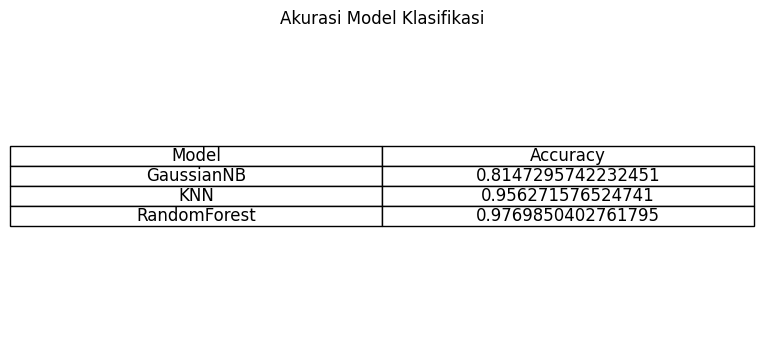

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Data hasil evaluasi
results = {
    'Model': ['GaussianNB', 'KNN', 'RandomForest'],
    'Accuracy': [accuracy_gnb, accuracy_knn, accuracy_rf_clf] 
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  # Menyembunyikan axis

table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

# Format tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  
plt.title('Akurasi Model Klasifikasi')
plt.show()


Setelah melakukan analisis terhadap dataset tersebut, dapat disimpulkan bahwa  model yang terbaik adalah Dipilih random forest. Dengan menggunakan Library sebagai Model Classifier untuk Deployement aplikasi

# DEPLOYEMENT

MENGAMBIL MODEL TERBAIK KE FILE JOBLIB

In [22]:
import joblib

In [23]:
joblib.dump(rf_clf, 'RF_model.joblib')

['RF_model.joblib']

# WEBSITE HASIL

https://huggingface.co/spaces/NikiRaihan/PSD-Klasifikasi-udara-jogja